# Decision trees and random forests
This workshop starts with deicsion trees before moving into the more complex random forest, which builds on the idea behind decision trees. Decision trees are a simple way to start machine learning.

Decision trees follow a flowchart-like structure with nodes for features and a branch for a decision/rule, where leaves from the nodes represent outcomes. We could use a decision tree, for instance, to help model someone's likelihood of needing statins by having a node for age, sub trees for weight and somking, and leaves for whetehr or not someone needs statins.

The process for making decision tree algorithms:
1. Select attributes to split records
2. Use the attribute as a decision node to break data into smaller subsets
3. Keep building trees until: all tuples belong to the same attribute value, there are no more remaining attributes, there are no more instances
We need to use Attribute Selection Measures (ASM) to help split attributes, they provide a score to tell us how well our splits work.


In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('/workspaces/D2I-Jupyter-Notebook-Tools/ml-data science tutorials/data/diabetes.csv', names=col_names, skiprows=1)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Now we have to split columns into dependent and independent variables, meaning target and feature variables, or, what we are testing for, and what affects the outcome.

In [2]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

• The first line defines a list of feature columns that will be used to create the feature matrix.
• The list contains the names of the columns that will be used as features, which are 'pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', and 'pedigree'.
• The second line creates a feature matrix X by selecting the columns specified in the feature_cols list from the pima dataset.
• The feature matrix X will contain the values of the selected columns for each observation in the dataset.
• The third line creates a target variable y by selecting the 'label' column from the pima dataset.
• The target variable y will contain the values of the 'label' column for each observation in the dataset.
• Overall, this code is used to prepare the data for machine learning by separating the features and target variable into separate variables.

When perfoming ML we need to  split our data into a training and test set, that is, one set for the model to try and build, and one to check how well the model that's been built works. We use the SKlearn train_test_split function for this.

In [3]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

• Splits code into test and training blocks
• creates a decision tree classifier object using the DecisionTreeClassifier() function.
• Then, it trains the classifier using the fit() method with the training data X_train and y_train.
• Finally, it uses the trained classifier to predict the response for the test dataset X_test and stores the predictions in y_pred.

Now we've built our model, let's see how goot it is by printing the accuracy score from metrics

Accuracy: 0.696969696969697


Text(0.5, 1.0, 'Confusion matrix')

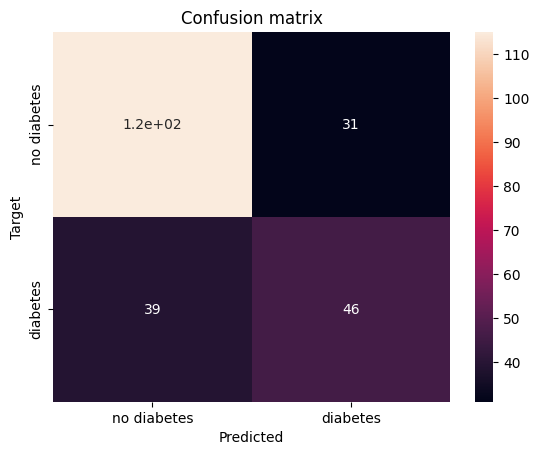

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


print('Accuracy:',metrics.accuracy_score(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=['no diabetes', 'diabetes'], 
            yticklabels=['no diabetes', 'diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion matrix')
# 1.2e2 is 120...

This is considered good accuracy. We can change the accuracy  by changing the parameters in the decision tree algorithm
• The metrics.accuracy_score() function is used to calculate the accuracy of a classification model.
• It takes two arguments: y_test and y_pred.
• y_test is the true labels of the test set, and y_pred is the predicted labels of the test set.
• The print() function is used to display the accuracy score on the console.
• The output will be a string that says "Accuracy:" followed by the actual accuracy score.

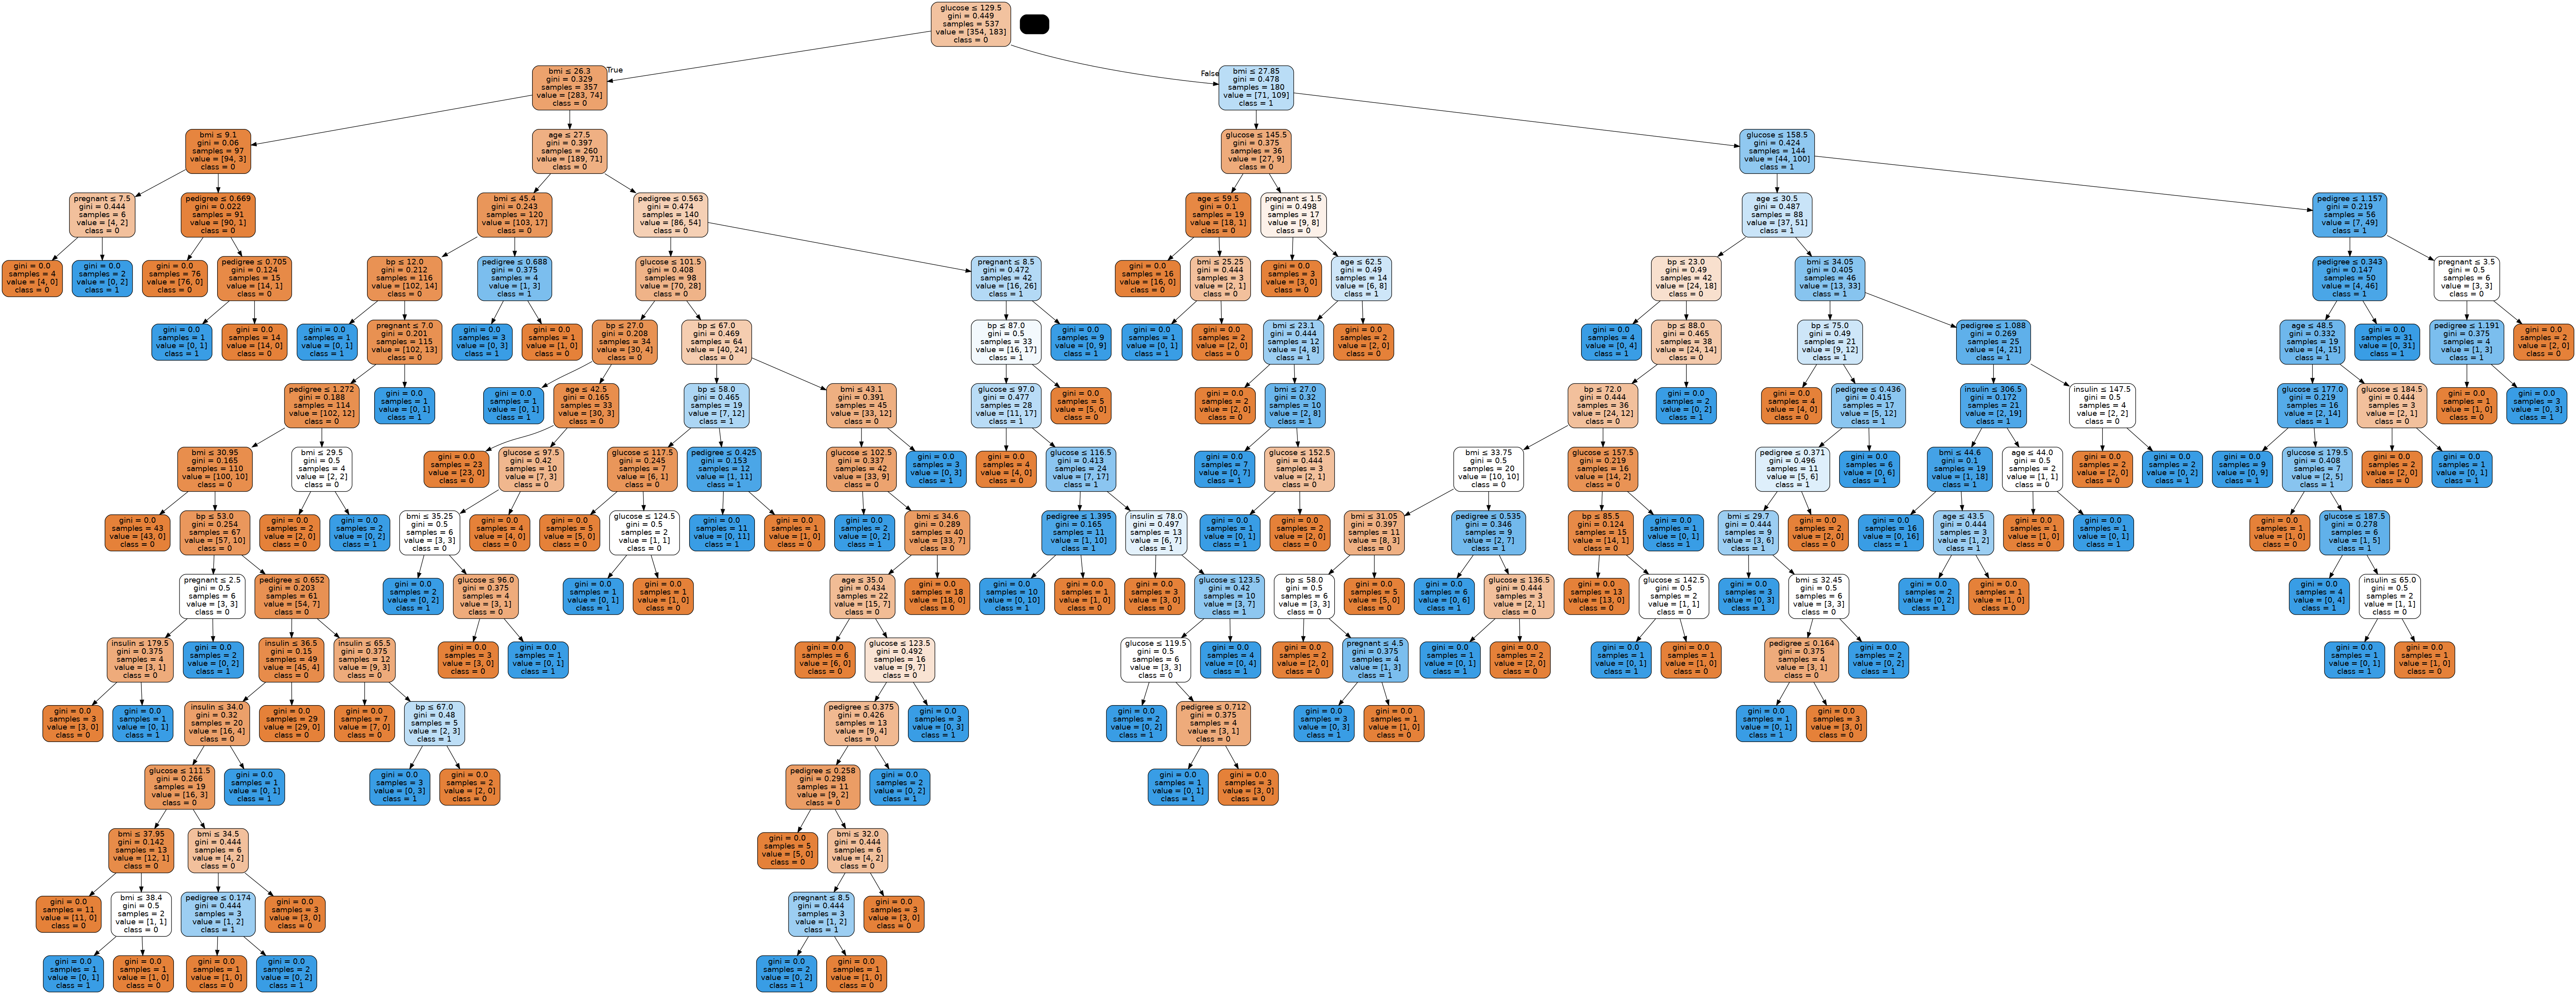

In [5]:
# pip install graphviz
# pip install pydotplus
# conda install graphviz
# I have no idea why we have to install graphviz twice, but this is how I could get it to work

from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


This is the initial tree generated by our ML algorithm. The gini number is how 'pure' the node is, that is, if all its records belong to the same class (such as is the case for leaf nodes). It's pretty uninteligible though, so we are going to do some work to make it make sense.

To improve tree performnce we can use three arguments: criterion, splitter, and max_depth. These, retrospectively: let us choose attribute measuers (gini as standard, also possible are gain ratio and information gain (google these to understand them)), choose the split strategy (between best split and random split), and the maximum depth of the tree (which can fix over/underfitting).

Let's prune the tree by redoing the calculations, but with different arguments:

In [6]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


We can see we've improved our accuracy score!
We are also now going to use different code to plot the tree in a momre readable way:

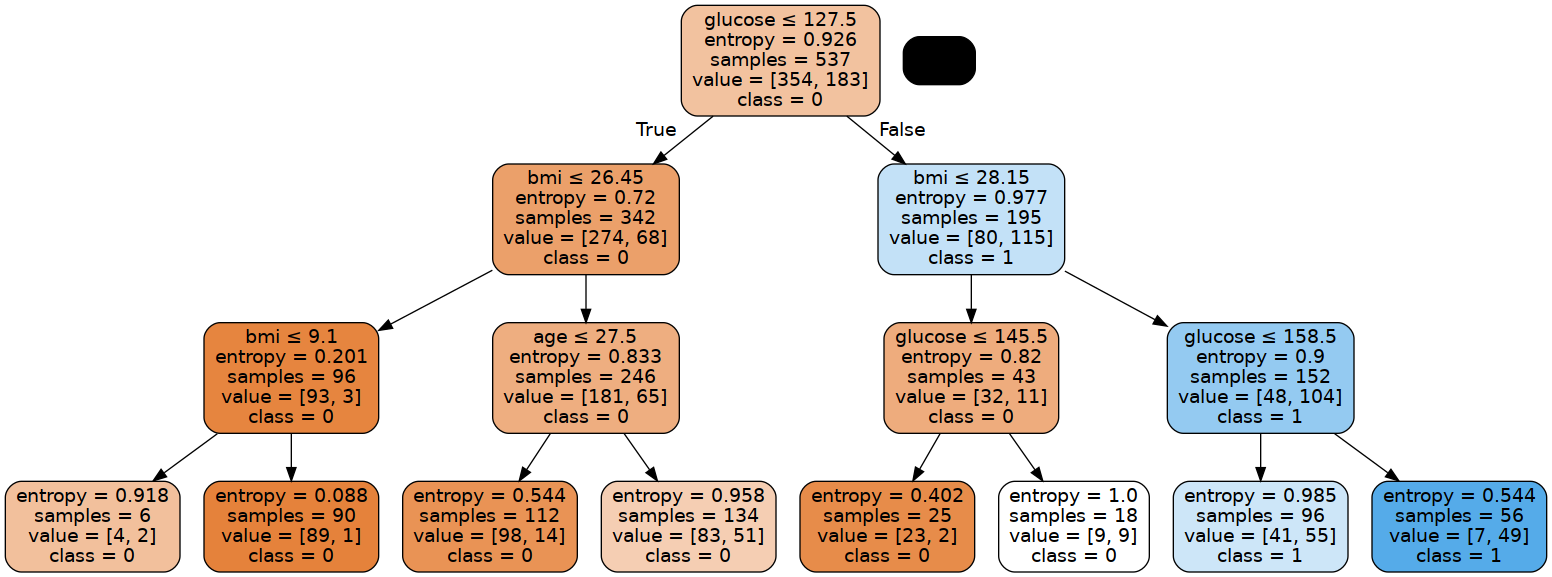

In [7]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

From this tree we can see that, according to the model, glucose over 127.5 predicts diabetes, further, in groups with glucose over 127.5, having a BMI of over 28.15 and a glucose of over 158.5 predicts diabetes, but a BMI over 28.15 and a glucose under 145.5 does not.

First off: the saturation of the colours of a node is an indication of higher predicted target values, of the samples in a node, what proportion of them end up being the outcome indicated by the node (so, if the node predicts no diabetes and 93 of the samples in that node do not have diabetes, and 3 do, it’ll be a saturated orange indicating, essentially, that most of the samples in that cell are in agreement with the prediction of the cell).

There were also two ways we looked at for what the model should prioritise in making the decision tree: minimising gini index, or maximising information gain, which then got confusing as when we chose to maximise information gain, the measure we got was entropy.

First, gini index is essentially a way of measuring, when we use a node to split data somewhere, how good that value we chose to split at (say glucose <= 127.5) is at separating samples into diabetes and non-diabetes categories. It’s trying to maximise non-diabetes on one side of the split and diabetes on the other, whilst minimising diabetes on the first side of the split, and non-diabetes on the other. Gini index is essentially a measure of this, and when we use gini index as a hyperparameter in our model, it tries to maximise this split, leading to a lower gini index. If the index was 0, for instance, that would mean that all of one of our outcomes will go into one side of the split.

The second attribute selection measure we looked at was entropy. Entropy is a measure of how homogenous the samples in a node are, or how random the samples in the node are. It can be though of as how messy the data is in a given node, or how much information our node gives us about the outcomes we want to predict. High entropy means the system is messy and doesn’t give us a lot of information about a prediction. When we use entropy as our splitting criteria, which we did for the second plot, this choses to split nodes will maximise the decrease in average entropy between nodes (this difference in average entropy is called information gain). Essentially then, when choosing entropy as our attribute selection method, we split nodes where, after that split, we have a more homogenous set of samples, which can be though of as having a better set of samples from which to make a prediction.
